In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
project_name = 'Michelin Restaurants'
project_number = 'project number :31'
names='shiraz hemo and roie carmeli and oriel ben zakay'

df = pd.DataFrame([project_name,project_number,names])
df


,0
0,Michelin Restaurants
1,project number :31
2,shiraz hemo and roie carmeli and oriel ben zakay


In [11]:
url = "https://github.com/shiraz3389/Michelin-Guide-Restaurants-2021/raw/main/one-star-michelin-restaurants.csv"
url

'https://github.com/shiraz3389/Michelin-Guide-Restaurants-2021/raw/main/one-star-michelin-restaurants.csv'

In [3]:
Restaurant = pd.read_csv(url)

In [4]:
Restaurant

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...
...,...,...,...,...,...,...,...,...,...,...
544,The Sportsman,2019,51.343920,0.958850,Seasalter,United Kingdom,CT5 4BP,Modern British,NaN,https://guide.michelin.com/gb/en/kent/seasalte...
545,West House,2019,51.115210,0.642150,Biddenden,United Kingdom,TN27 8AH,Modern British,NaN,https://guide.michelin.com/gb/en/kent/biddende...
546,Fordwich Arms,2019,51.295284,1.126187,Fordwich,United Kingdom,CT2 0DB,Modern cuisine,NaN,https://guide.michelin.com/gb/en/kent/fordwich...
547,Samphire,2019,49.184880,-2.105700,Saint Helier/Saint-Hélier,United Kingdom,JE2 4TQ,Modern cuisine,NaN,https://guide.michelin.com/gb/en/saint-helier/...


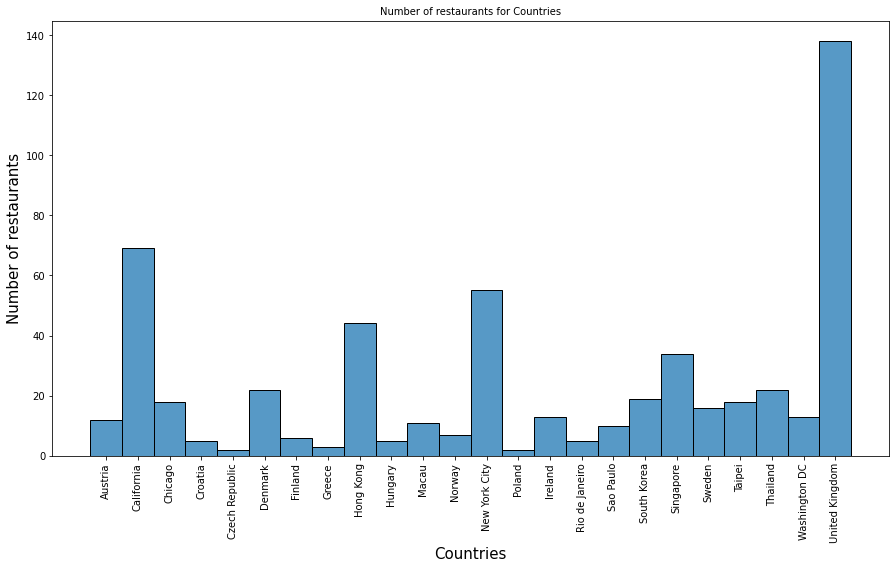

In [5]:
plt.figure(figsize = (15,8))
sns.histplot(data=Restaurant, x='region')
plt.xticks(rotation=90)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of restaurants',fontsize=15)
plt.title("Number of restaurants for Countries",fontsize=10)
plt.show()

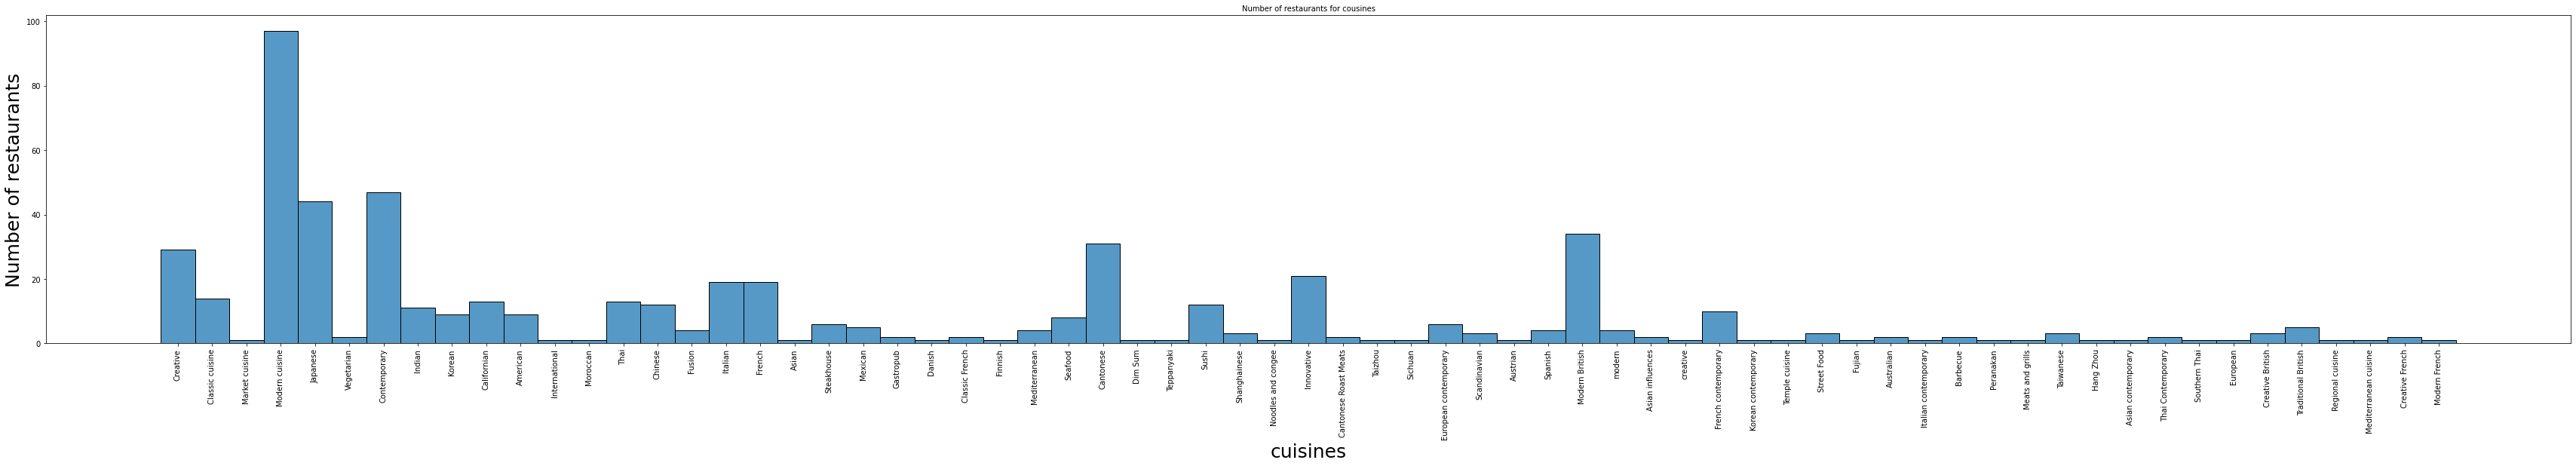

In [6]:
plt.figure(figsize = (60,8))
sns.histplot(data=Restaurant, x='cuisine')
plt.xticks(rotation=90)
plt.xlabel('cuisines',fontsize=25)
plt.ylabel('Number of restaurants',fontsize=25)
plt.title("Number of restaurants for cousines",fontsize=10)
plt.show()

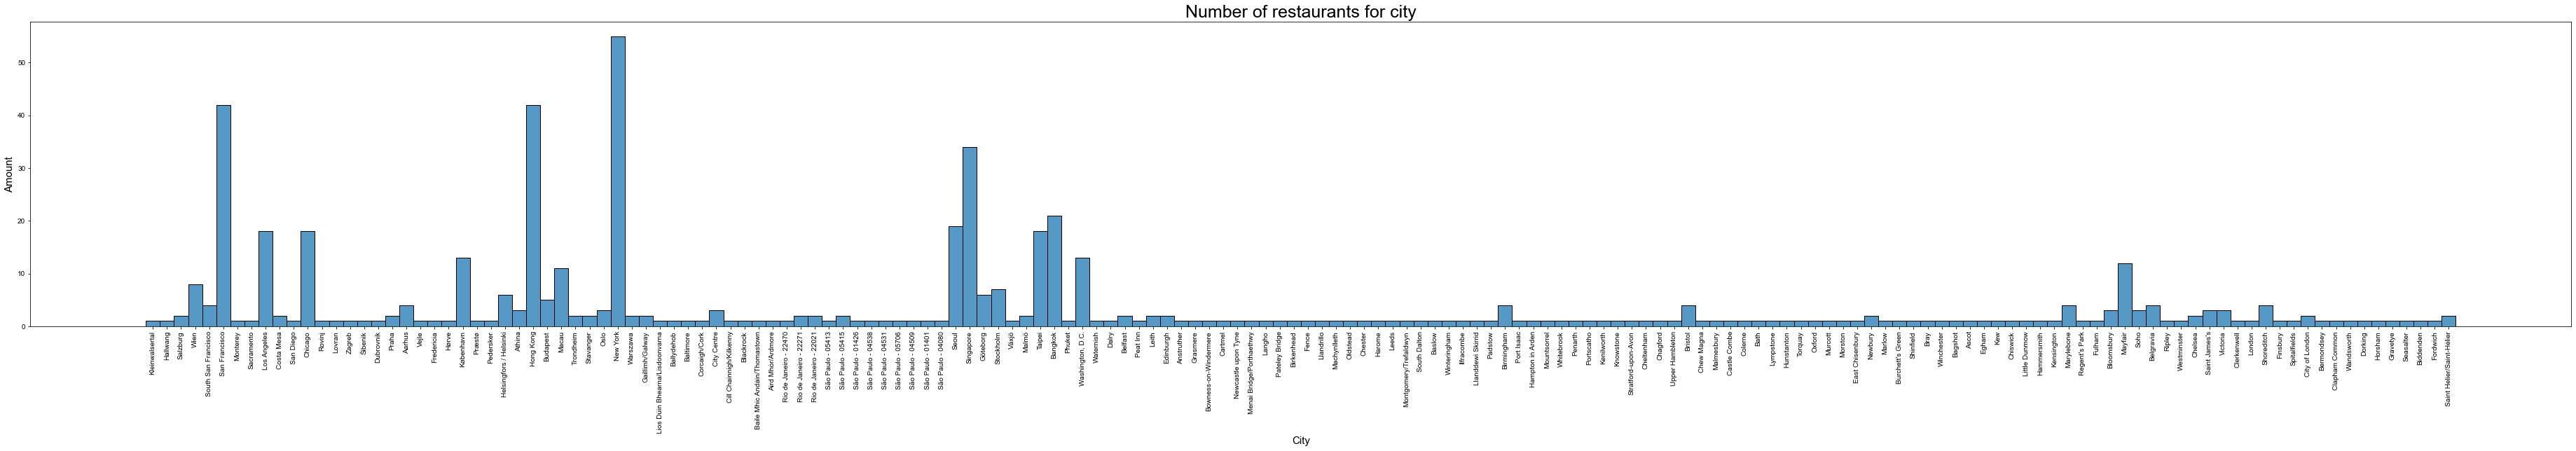

In [7]:
plt.figure(figsize = (65,8))
sns.histplot(data=Restaurant, x='city')
plt.xticks(rotation=90)
sns.set(font_scale = 3)
plt.xlabel('City',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.title("Number of restaurants for city",fontsize=25)
plt.show()

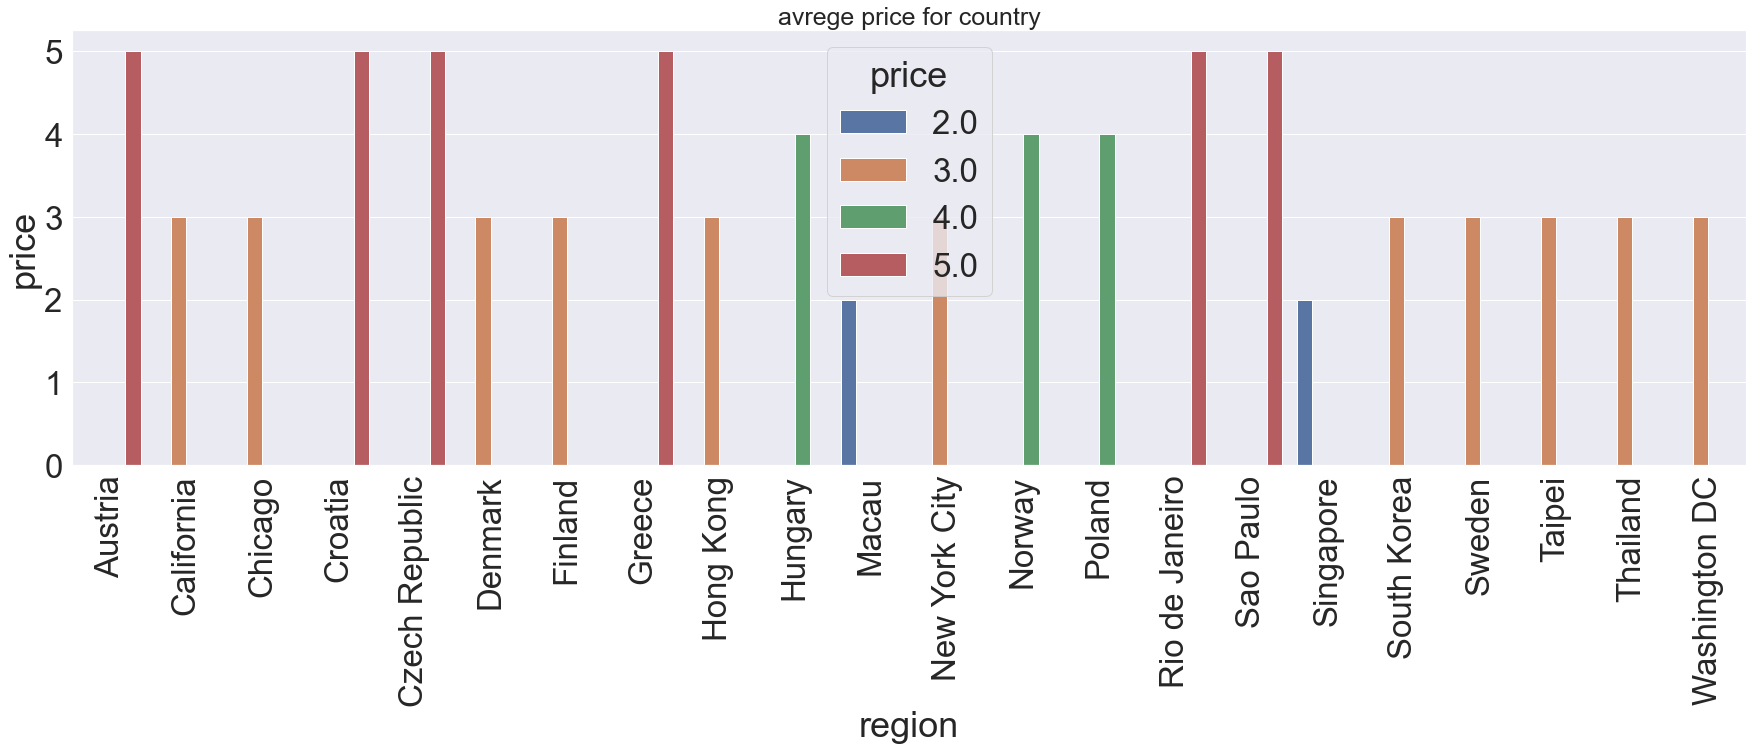

In [8]:
datanonan= Restaurant.dropna(subset=['price'])
new= datanonan.iloc[:,[5,8]]
plt.figure(figsize = (30,8) )
plt.xticks(rotation=90)
new = new.replace({'price': {'$':1, '$$':2, '$$$':3, '$$$$':4, '$$$$$':5}})
new =new.groupby("region")[["price"]].mean().round(0)
new =new.reset_index()
sns.barplot(data = new , y = 'price',x='region', hue='price')
plt.title("avrege price for country",fontsize=25)
plt.show()


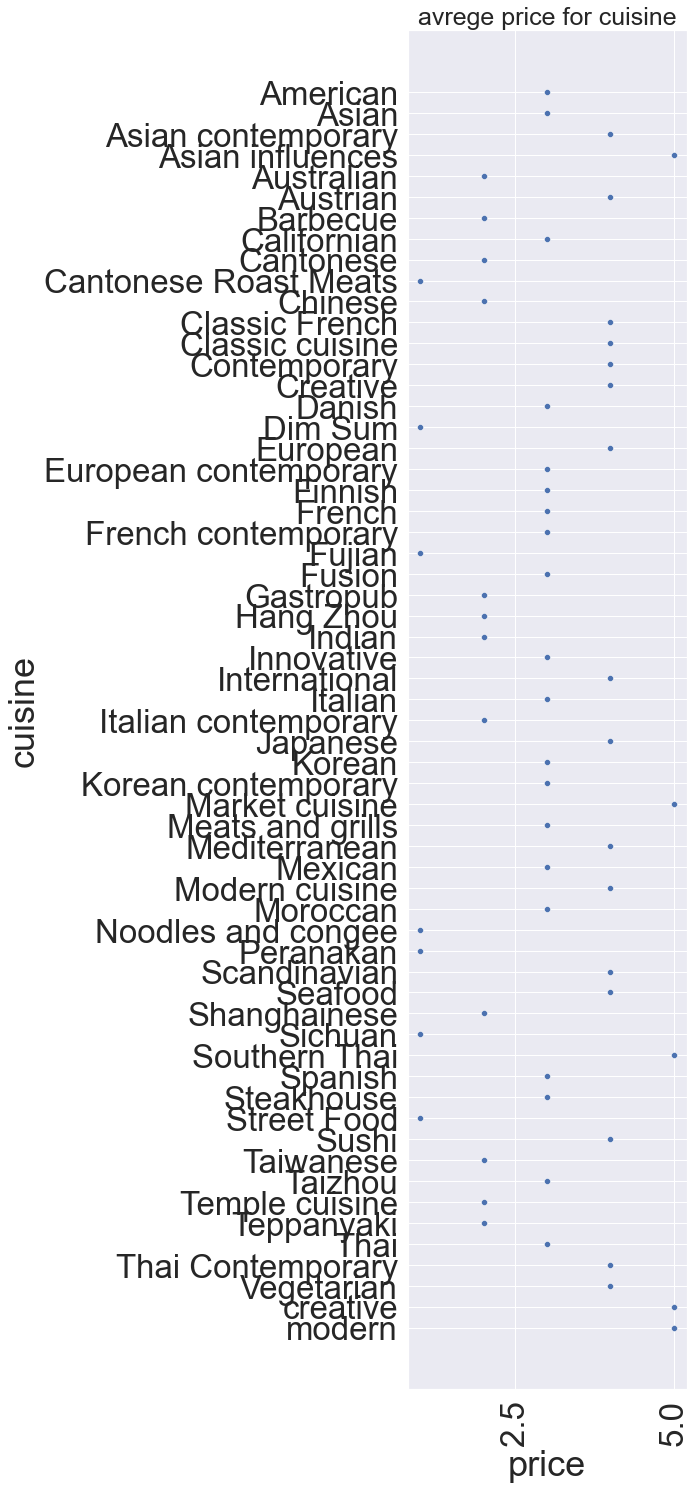

In [9]:
price_for_cuisine= datanonan.iloc[:,[5,7,8]]
price_for_cuisine = price_for_cuisine.replace({'price': {'$':1, '$$':2, '$$$':3, '$$$$':4, '$$$$$':5}})
price_for_cuisine =price_for_cuisine.groupby("cuisine")[["price"]].mean().round(0)
price_for_cuisine =price_for_cuisine.reset_index()
plt.figure(figsize = (5,25) )
plt.xticks(rotation=90)
sns.scatterplot(data = price_for_cuisine, x = 'price', y = 'cuisine')
plt.title("avrege price for cuisine",fontsize=25)
plt.show()

מסקנות:
1. אנו רואים שבערי מסחר עם אוכלוסיה גדולה ועשירה לרוב נמצא כמות מסעדות מישלן גבוהה
2. אנו רואים שסגנון המסעדה לא משפיע על המחיר וברוב הסגנונות המחיר הממוצע דומה
3. רוב מסעדות המישלן בעלות כוכב 1 נמצאות ביבשת אירופה